# Simulation Examples

This notebook uses simulations to introduce and explore key points about aperiodic neural activty for the aperiodic-clinical project. 

Tooling:
- Time domain simulations and analyses are done with the [neurodsp](https://neurodsp-tools.github.io/) module.
- Frequency domain simulations and spectral parameterization are done with the [specparam](https://specparam-tools.github.io/) module.

In [1]:
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt

from neurodsp.sim import sim_combined
from neurodsp.utils import create_times
from neurodsp.plts import plot_time_series
from neurodsp.spectral import compute_spectrum
from neurodsp.spectral.utils import rotate_powerlaw
from neurodsp.utils import set_random_seed

from specparam import SpectralModel, Bands
from specparam.plts import plot_spectra
from specparam.plts.utils import add_shades
from specparam.utils import trim_spectrum

In [2]:
import seaborn as sns
sns.set_context('talk')

## TEMP

In [3]:
def add_shades(ax, shades, colors='r', add_center=False, logged=False, alpha=0.2):

    # If only one shade region is specified, this embeds in a list, so that the loop works
    if not isinstance(shades[0], list):
        shades = [shades]

    colors = repeat(colors) if not isinstance(colors, list) else colors

    for shade, color in zip(shades, colors):

        shade = np.log10(shade) if logged else shade

        ax.axvspan(shade[0], shade[1], color=color, alpha=alpha, lw=0)

        if add_center:
            center = sum(shade) / 2
            ax.axvspan(center, center, color='k', alpha=0.6)

## Settings

In [4]:
set_random_seed(13)

### Plot Settings

In [5]:
# Plot settings
BANDS = Bands({'theta' : [3, 8],
               'alpha' : [8, 13],
               'beta' : [13, 35]})

BAND_COLORS = {'theta' : '#46b870',
               'alpha' : '#1882d9',
               'beta'  : '#a218d9'}

In [6]:
# Define figure save path folder
save_folder = Path('./figs/')

In [7]:
# Set plot run settings
SAVE_FIG = True

### Simulation Settings

In [8]:
# Simulation settings
fs = 500
n_seconds = 120

In [9]:
# Create a times vector
times = create_times(n_seconds, fs)

## Simulations

In [10]:
# Define simulation parameters for single example signal
comps = {'sim_powerlaw' : {'exponent' : -1.25, 'f_range' : [1., 55]}, 
         'sim_bursty_oscillation' : {'freq' : 10, 'enter_burst' : 0.25, 'leave_burst' : 0.3}}

In [11]:
# Simulate signal
sig = sim_combined(n_seconds, fs, comps, [0.75, 1])

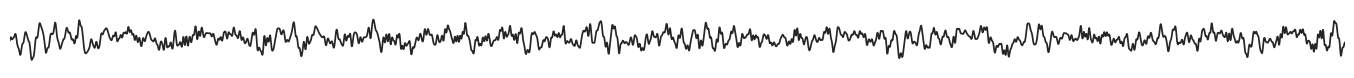

In [12]:
# Plot the time series
plot_time_series(times, sig, lw=1.25, alpha=0.85, xlim=[8, 18], figsize=(15, 1.75))
plt.gca().axis('off');
if SAVE_FIG:
    plt.savefig(save_folder / 'time_series.pdf', bbox_inches='tight')

#### Power Spectrum Analysis

In [13]:
# Compute the power spectrum
freqs, powers = compute_spectrum(sig, fs, nperseg=1.5*fs, noverlap=fs)

In [14]:
# Fit a spectral model to the 
fm = SpectralModel(verbose=False)
fm.fit(freqs, powers, freq_range=[1, 50])

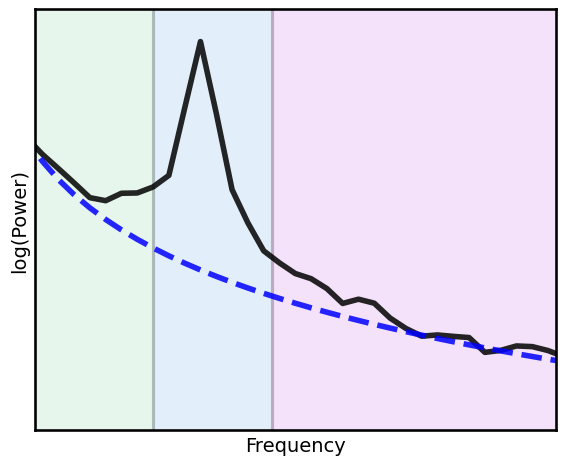

In [15]:
_, ax = plt.subplots(figsize=(6, 5))
plot_spectra(fm.freqs, [fm.power_spectrum, fm._ap_fit], 
             alpha=0.85, log_freqs=False, log_powers=False, 
             lw=4, colors=['black', 'blue'], 
             ylabel='log(Power)', linestyle=['-', '--'],
             xlim=[3, 25], ylim=[-2.7, -0.45], ax=ax)
ax.set(xticks=[], yticks=[])

ax.axvline(8, color='grey', linestyle='-', alpha=0.5, zorder=0)
ax.axvline(13, color='grey', linestyle='-', alpha=0.5, zorder=0)

add_shades(ax,
           [BANDS.theta, BANDS.alpha, BANDS.beta],
           colors=[BAND_COLORS['theta'], BAND_COLORS['alpha'], BAND_COLORS['beta']],
           alpha=0.125, logged=False)

if SAVE_FIG:
    plt.savefig(save_folder / 'spectrum.pdf', bbox_inches='tight')

## Comparison

In [16]:
# # Define simulation parameters for single example signal
# comps1 = {'sim_powerlaw' : {'exponent' : -0.75, 'f_range' : [1., 55]}, 
#           'sim_bursty_oscillation' : {'freq' : 10, 'enter_burst' : 0.25, 'leave_burst' : 0.3}}
# comps2 = {'sim_powerlaw' : {'exponent' : -1.25, 'f_range' : [1., 55]}, 
#           'sim_bursty_oscillation' : {'freq' : 10, 'enter_burst' : 0.25, 'leave_burst' : 0.3}}

In [17]:
# # Simulate signal
# sig1 = sim_combined(n_seconds, fs, comps1, [0.75, 1])
# sig2 = sim_combined(n_seconds, fs, comps2, [0.75, 1])

In [18]:
# # Compute the power spectrum
# freqs1, powers1 = compute_spectrum(sig1, fs, nperseg=1.5*fs, noverlap=fs)
# freqs2, powers2 = compute_spectrum(sig2, fs, nperseg=1.5*fs, noverlap=fs)

In [19]:
# Create a
powers2 = rotate_powerlaw(freqs, powers, -0.5, f_rotation=12.5)

In [20]:
#col1 = '#1653b5'
col1 = '#3a11f0'
#col2 = '#7716c7'
col2 = '#f01145'

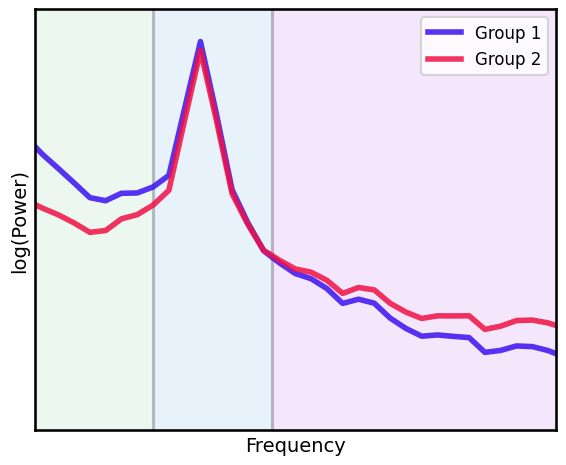

In [24]:
_, ax = plt.subplots(figsize=(6, 5))
plot_spectra(freqs,
             [powers, powers2],
             labels=['Group 1', 'Group 2'],
             alpha=0.85, log_freqs=False, log_powers=True, 
             lw=4, 
             #colors=['blue', 'orange'], 
             colors=[col1, col2],
             ylabel='log(Power)', 
             #linestyle=['-', '--'],
             xlim=[3, 25], 
             ylim=[-2.7, -0.45], 
             ax=ax)
ax.set(xticks=[], yticks=[])

ax.axvline(8, color='grey', linestyle='-', alpha=0.5, zorder=0)
ax.axvline(13, color='grey', linestyle='-', alpha=0.5, zorder=0)

add_shades(ax,
           [BANDS.theta, BANDS.alpha, BANDS.beta],
           colors=[BAND_COLORS['theta'], BAND_COLORS['alpha'], BAND_COLORS['beta']],
           alpha=0.10, logged=False)

if SAVE_FIG:
    plt.savefig(save_folder / 'spectrum_comp.pdf', bbox_inches='tight')